# Analysis and Prediction of 911 Calls based on Location


# 1.Data Selection

## For the purposes of this experimental project, the 911 records for Baltimore County have been used, downloaded from Baltimore policedepartment’s website 

### https://data.baltimorecity.gov/datasets/911-calls-for-service-2019/explore

## Import numpy and pandas

In [1]:
import pandas as pd
import numpy as np

## Import visualization libraries and set %matplotlib inline. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Read in the csv file as a dataframe called df 

In [3]:
df = pd.read_csv('Final.csv')

## Check the info() of the df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100671 entries, 0 to 100670
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   100671 non-null  int64  
 1   objectid                     100671 non-null  int64  
 2   recordid                     100671 non-null  int64  
 3   callkey                      100671 non-null  object 
 4   calldatetime                 100671 non-null  object 
 5   priority                     100671 non-null  object 
 6   district                     100671 non-null  object 
 7   description                  100671 non-null  object 
 8   callnumber                   100671 non-null  object 
 9   incidentlocation             100671 non-null  object 
 10  location                     100671 non-null  object 
 11  neighborhood                 98994 non-null   object 
 12  policedistrict               98995 non-null   object 
 13 

## Check the head of df

In [5]:
df.head(15)

,Unnamed: 0,objectid,recordid,callkey,calldatetime,priority,district,description,callnumber,incidentlocation,...,policedistrict,policepost,councildistrict,sheriffdistricts,community_statistical_areas,census_tracts,vrizones,zipcode,latitude,longitude
0,85214,318342,6929743,5B01020A5DEB0B6B,2019/12/06 21:16:00+00,Medium,ED,COMMON ASSAULT,P193404470,900 N CAROLINE ST,...,Eastern,313.0,12.0,D5,Oldtown/Middle East,Census Tract 704,NaN,21205.0,40.733733,-74.000338
1,105196,784582,6014778,9C01020A5C881135,2019/03/12 16:06:00+00,Non-Emergency,NE,Repairs/Service,P190712828,BIDDLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
2,102284,788643,6021901,9C01020A5C8A48B9,2019/03/14 08:27:00+00,Non-Emergency,SE,Court,P190731096,TCE,...,Eastern,342.0,12.0,D5,Clifton-Berea,Census Tract 805,Eastern1,21213.0,39.314977,-76.603728
3,27881,278633,6644983,5A01020A5D90C7BA,2019/09/29 11:03:00+00,Medium,NE,COMMON ASSAULT,P192721352,5100 RICHARD AV,...,Northeastern,426.0,3.0,D4,Lauraville,Census Tract 2703.02,NaN,21214.0,39.343306,-76.557530
4,27313,1259659,6924624,9C01020A5DE99527,2019/12/05 18:39:00+00,Non-Emergency,WD,Business Check,P193393800,1700 W NORTH AV,...,Western,742.0,7.0,D9,Sandtown-Winchester/Harlem Park,Census Tract 1502,Western,21217.0,39.303932,-76.643138
5,41761,1374959,6198525,A701020A5CBEF173,2019/04/23 07:05:00+00,Non-Emergency,WD,Business Check,P191130842,900 N MONROE ST,...,Western,722.0,9.0,D8,Sandtown-Winchester/Harlem Park,Census Tract 1604,NaN,21217.0,39.296294,-76.649802
6,85081,175012,6970225,5701020A5DF7B7F9,2019/12/16 11:59:00+00,Low,TRU,911/NO VOICE,P193502037,400 W 26TH ST,...,Northern,511.0,12.0,D2,Medfield/Hampden/Woodberry/Remington,Census Tract 1207,NaN,21211.0,39.228114,-84.321327
7,131658,502180,6548809,6101020A5D6DCB4A,2019/09/02 22:09:00+00,Medium,SD,NARCOTICS,P192453593,POTEE ST/W PATAPSCO AV,...,Southern,913.0,10.0,D7,Brooklyn/Curtis Bay/Hawkins Point,Census Tract 2504.01,NaN,21225.0,40.652601,-73.949721
8,19565,879909,6228835,9C01020A5CC7D6BD,2019/04/30 01:01:00+00,Non-Emergency,NW,Hot Spot Check,P191200175,3100 SPAULDING AV,...,Northwestern,614.0,6.0,D1,Pimlico/Arlington/Hilltop,Census Tract 2717,NaN,21215.0,39.344459,-76.671235
9,133529,1279476,6967218,9C01020A5DF6BA70,2019/12/15 17:57:00+00,Non-Emergency,NW,COMMUNITY ENGAGE,P193493337,6400 REISTERSTOWN RD,...,Northwestern,632.0,5.0,D1,Glen-Fallstaff,Census Tract 2720.06,NaN,21215.0,42.894399,-74.344867


## Take look of Columns

In [6]:
df. columns

Index(['Unnamed: 0', 'objectid', 'recordid', 'callkey', 'calldatetime',
       'priority', 'district', 'description', 'callnumber', 'incidentlocation',
       'location', 'neighborhood', 'policedistrict', 'policepost',
       'councildistrict', 'sheriffdistricts', 'community_statistical_areas',
       'census_tracts', 'vrizones', 'zipcode', 'latitude', 'longitude'],
      dtype='object')

## Basic Questions

## What are the top 5 zipcodes for 911 calls?

In [7]:
df['zipcode'].value_counts().head(5)

21217.0    11452
21223.0     8381
21215.0     8076
21218.0     7539
21202.0     6607
Name: zipcode, dtype: int64

## What are the top 5 Location for 911 calls?

In [8]:
df['incidentlocation'].value_counts().head(5)

100                   1396
3100 W NORTH AV        552
3200 GREENMOUNT AV     380
5300 YORK RD           350
4100 FREDERICK AV      338
Name: incidentlocation, dtype: int64

## How many types of discription cases?

In [9]:
df['description'].nunique()

590

## How many District in State?

In [10]:
df['district'].nunique()

12

## How many Zipcode ?

In [11]:
df['zipcode'].nunique()

32

# 2. Exploratory Data Analysis (EDA)

## Plot representing a Distribution of cases for the 911 call over the differnt district

<AxesSubplot:xlabel='district', ylabel='count'>

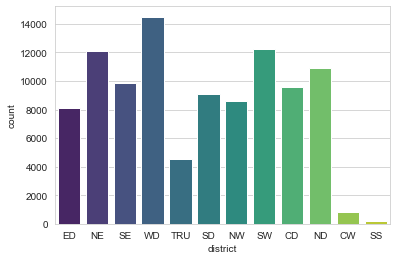

In [12]:
sns.countplot(x='district',data=df,palette='viridis')

## Plot representing a Distribution of cases for the 911 call over the differnt district

<AxesSubplot:xlabel='zipcode', ylabel='count'>

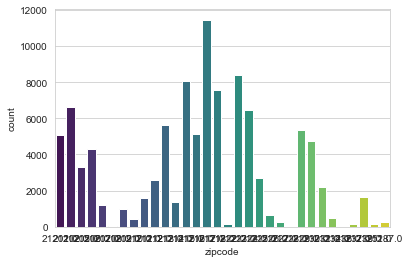

In [13]:
sns.countplot(x='zipcode',data=df,palette='viridis')

## Convert the column from strings to DateTime objects.

In [14]:
type(df['calldatetime'].iloc[0])

str

In [15]:
df['calldatetime'] = pd.to_datetime(df['calldatetime'])

In [16]:
type(df['calldatetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

## Split callDateTime column into year, month, dayofmonth, dayofweek, dayofyear, hour, minutes, weekyear

In [17]:
df['year'] = df['calldatetime'].apply(lambda time: time.year)
df['month'] = df['calldatetime'].apply(lambda time: time.month)
df['dayofmonth'] = df['calldatetime'].apply(lambda time: time.day)
df['dayofweek'] = df['calldatetime'].apply(lambda time: time.dayofweek)
df['dayofyear'] = df['calldatetime'].apply(lambda time: time.dayofyear)
df['hour'] = df['calldatetime'].apply(lambda time: time.hour)
df['minute'] = df['calldatetime'].apply(lambda time: time.minute)
df['weekofyear'] = df['calldatetime'].apply(lambda time: time.weekofyear)

<ipython-input-17-2b9e9fffe09d>:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df['calldatetime'].apply(lambda time: time.weekofyear)


## Crime Rate Analysis

## Monthly count of 911 calls

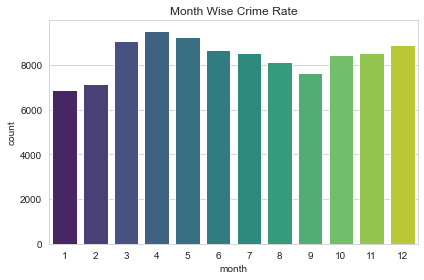

In [18]:
sns.countplot(x='month',data=df,palette='viridis')
plt.title('Month Wise Crime Rate')
plt.tight_layout()

## Day wise count of 911 calls

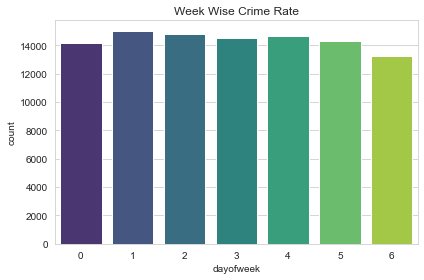

In [19]:
sns.countplot(x='dayofweek',data=df,palette='viridis')
plt.title('Week Wise Crime Rate')
plt.tight_layout()

## Hourly  count of 911 calls

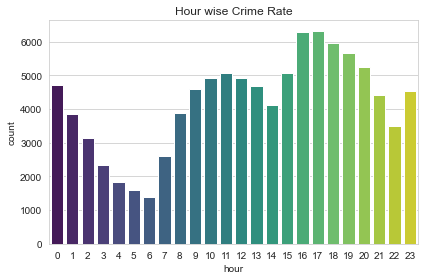

In [20]:
sns.countplot(x='hour',data=df,palette='viridis')
plt.title('Hour wise Crime Rate')
plt.tight_layout()

## Count of 911 calls for Day of week categorize  by priority

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

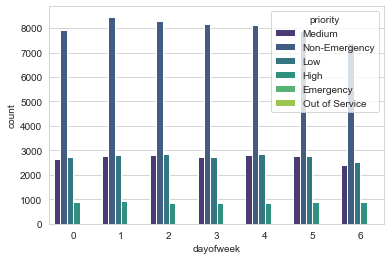

In [21]:
sns.countplot(x='dayofweek',data=df,hue='priority',palette='viridis')

# To relocate the legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Count of 911 calls for Day of week categorize  by priority

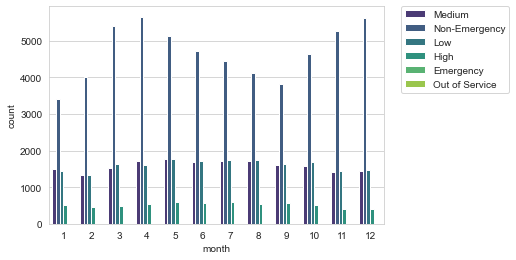

In [22]:
sns.countplot(x='month',data=df,hue='priority',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [23]:
byMonth = df.groupby('month').count()


## Anually incidencelocation grouped by month for 911 calls

<AxesSubplot:xlabel='month'>

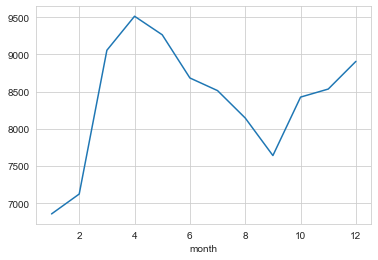

In [24]:

byMonth['incidentlocation'].plot()

## reset the index to a column

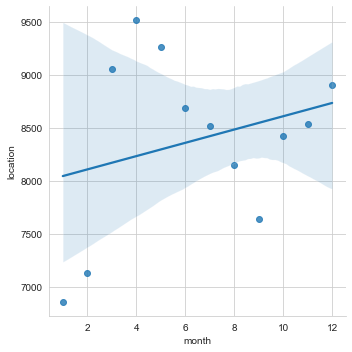

In [25]:
sns.lmplot(x='month',y='location',data=byMonth.reset_index())

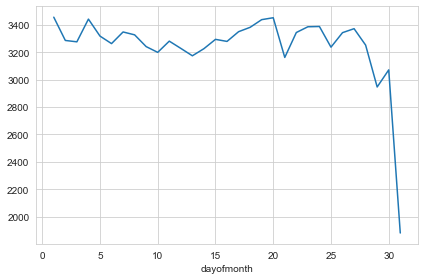

In [26]:
df.groupby('dayofmonth').count()['location'].plot()
plt.tight_layout()

## Priority wise distribution of 911 calls over the day of months

## High priority

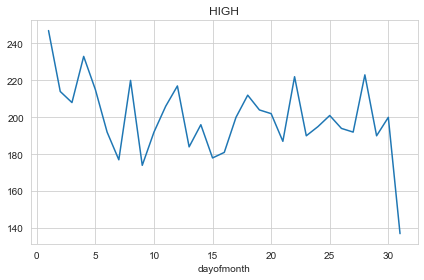

In [27]:
df[df['priority']=='High'].groupby('dayofmonth').count()['location'].plot()
plt.title('HIGH')
plt.tight_layout()

## Low Priority

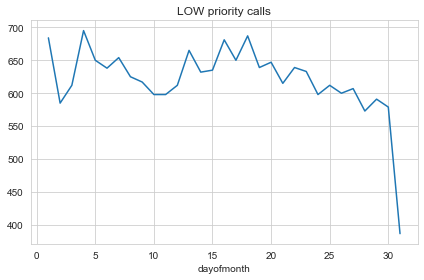

In [28]:
df[df['priority']=='Low'].groupby('dayofmonth').count()['location'].plot()
plt.title('LOW priority calls')
plt.tight_layout()

## Medium Priority

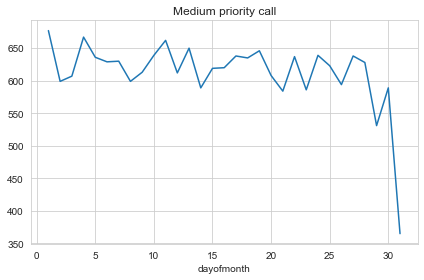

In [29]:
df[df['priority']=='Medium'].groupby('dayofmonth').count()['location'].plot()
plt.title('Medium priority call')
plt.tight_layout()

## Non Emergancy

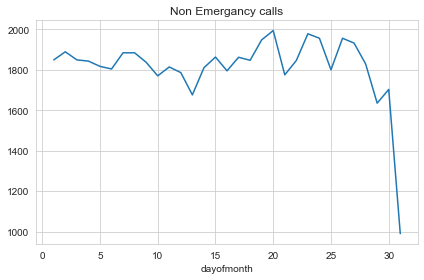

In [30]:
df[df['priority']=='Non-Emergency'].groupby('dayofmonth').count()['location'].plot()
plt.title('Non Emergancy calls')
plt.tight_layout()

## Emergancy

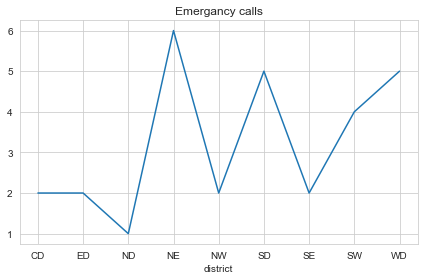

In [31]:
df[df['priority']=='Emergency'].groupby('district').count()['location'].plot()
plt.title('Emergancy calls')
plt.tight_layout()

## need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week

In [32]:
dayHour = df.groupby(by=['dayofweek','hour']).count()['location'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,638,488,426,337,289,228,181,416,524,653,...,597,759,921,940,827,758,678,593,481,647
1,638,544,432,284,260,259,197,366,585,698,...,619,778,963,1012,940,904,752,662,486,650
2,675,527,444,342,251,199,214,412,561,661,...,625,723,944,930,868,855,781,667,510,626
3,679,547,422,302,242,210,213,374,569,697,...,632,709,926,920,876,829,803,599,510,579
4,665,539,435,345,258,256,205,387,619,709,...,574,745,880,854,818,862,765,707,558,684


## HeatMap using this new DataFrame

<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

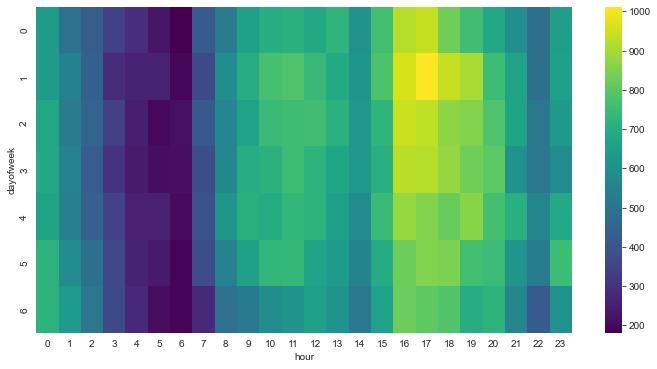

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

# 3. Data Pre-Processing

## Checking for null value

In [34]:
df.isna().sum()

Unnamed: 0                         0
objectid                           0
recordid                           0
callkey                            0
calldatetime                       0
priority                           0
district                           0
description                        0
callnumber                         0
incidentlocation                   0
location                           0
neighborhood                    1677
policedistrict                  1676
policepost                      1673
councildistrict                 1669
sheriffdistricts                1671
community_statistical_areas     1705
census_tracts                   1676
vrizones                       83073
zipcode                         1701
latitude                           0
longitude                          0
year                               0
month                              0
dayofmonth                         0
dayofweek                          0
dayofyear                          0
h

In [35]:
df= df.dropna()

In [36]:
df.isna().sum().count()

30

## Dropped the  unnesessary column

In [37]:
#df= df.drop(['recordid', 'year','policepost', 'councildistrict', 'sheriffdistricts', 'community_statistical_areas', 'census_tracts','vrizones'],axis=1)

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['priority']=le.fit_transform(df['priority'])
df['district']=le.fit_transform(df['district'])
df['policeDistrict']=le.fit_transform(df['policedistrict'])

In [39]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 4. Model Building

## find the corelation beetween coloumns

In [40]:
df.corr()

,objectid,recordid,priority,district,policepost,councildistrict,zipcode,latitude,longitude,year,month,dayofmonth,dayofweek,dayofyear,hour,minute,weekofyear,policeDistrict
objectid,1.000000,0.191970,0.645363,0.089986,0.036561,-0.087249,0.012261,0.035348,0.067327,NaN,0.269241,0.013834,0.015268,0.269540,-0.055383,0.000179,0.259066,0.106867
recordid,0.191970,1.000000,0.047183,0.054139,0.061609,-0.028630,0.042858,0.064160,0.063822,NaN,0.614511,0.065975,0.011424,0.614306,-0.004317,-0.001996,0.603616,0.062781
priority,0.645363,0.047183,1.000000,0.071463,0.023569,-0.093853,0.001726,0.003761,0.041114,NaN,0.022643,0.013906,-0.011178,0.023586,-0.054516,-0.006775,0.022509,0.092212
district,0.089986,0.054139,0.071463,1.000000,0.724923,-0.491996,0.513639,0.257029,0.321244,NaN,0.013463,-0.000268,-0.005754,0.012997,0.004686,-0.017164,0.015470,0.910190
policepost,0.036561,0.061609,0.023569,0.724923,1.000000,-0.449914,0.736427,0.367192,0.418125,NaN,0.038357,-0.009055,-0.014246,0.037174,0.011001,-0.009880,0.039451,0.847195
councildistrict,-0.087249,-0.028630,-0.093853,-0.491996,-0.449914,1.000000,-0.140769,0.044290,-0.032190,NaN,0.015146,0.003020,-0.006220,0.015656,0.009162,0.009957,0.014533,-0.474751
zipcode,0.012261,0.042858,0.001726,0.513639,0.736427,-0.140769,1.000000,0.245474,0.326065,NaN,0.027937,-0.002305,-0.017932,0.027429,0.020765,-0.010590,0.028324,0.587950
latitude,0.035348,0.064160,0.003761,0.257029,0.367192,0.044290,0.245474,1.000000,0.830785,NaN,0.078266,0.013986,-0.012173,0.079119,-0.020269,-0.003887,0.077256,0.287243
longitude,0.067327,0.063822,0.041114,0.321244,0.418125,-0.032190,0.326065,0.830785,1.000000,NaN,0.072978,0.014593,-0.009044,0.073908,-0.024195,-0.006994,0.074458,0.357931
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

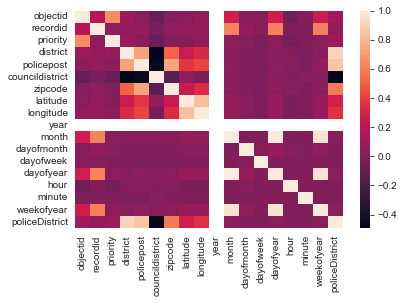

In [41]:
sns.heatmap(df.corr())

In [42]:
df.columns


Index(['objectid', 'recordid', 'callkey', 'calldatetime', 'priority',
       'district', 'description', 'callnumber', 'incidentlocation', 'location',
       'neighborhood', 'policedistrict', 'policepost', 'councildistrict',
       'sheriffdistricts', 'community_statistical_areas', 'census_tracts',
       'vrizones', 'zipcode', 'latitude', 'longitude', 'year', 'month',
       'dayofmonth', 'dayofweek', 'dayofyear', 'hour', 'minute', 'weekofyear',
       'policeDistrict'],
      dtype='object')

# 5.Model Building

## Fixed Dependent and independent Variables

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['priority']=le.fit_transform(df['priority'])
df['district']=le.fit_transform(df['district'])
df['policedistrict']=le.fit_transform(df['policedistrict'])

In [44]:
df['calldatetime'] = pd.to_datetime(df['calldatetime'])
df['calldatetime'] = (df['calldatetime'] - df['calldatetime'].iloc[0])/pd.to_timedelta('1Min')

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Profit is the dependent column
y = df['policepost']

# start with nothing
x_names = []

# the previous r2
previous_r2 = -1

# list of all columns
columns = ['priority','district', 'policedistrict', 'policepost', 'councildistrict','zipcode', 'latitude', 'longitude', 'year', 'month',
       'dayofmonth', 'dayofweek', 'dayofyear', 'hour', 'minute', 'weekofyear']

# choose one col at a time and check its significance
for col in columns:
    
    # this will hold all the variables need to pass to the model
    temp_variables = []
    
    # add previously selected variable(s)
    temp_variables.extend(x_names)
    
    # add the current column
    temp_variables.append(col)
    
    print(f"selected columns {temp_variables}")
    
    # get all the variables in the form of a df
    x = df[temp_variables]
    
    # create model 
    model = LinearRegression()
    
    # train the model
    model.fit(x, y)
    
    # predict the values
    predictions = model.predict(x)
    
    # evaluate the model
    r2 = r2_score(y, predictions)

    print(f"previous r2 = {previous_r2}, current r2 = {r2}")
    
    # check if this is the first variable
    if previous_r2 == -1:
        previous_r2 = r2
        x_names.append(col)
        print(rf"since this is the first column, add ({col}) it to the list")
    else:
        # check if this r2 is greater than the previous one
        # if r2 > previous_r2:
        
        # check if the r2 difference is significant
        print(f"r2 - previous_r2 = {r2 - previous_r2}")
        if (r2 - previous_r2) >= 0.05:
            previous_r2 = r2
            x_names.append(col)
            print(f"found col: {col} increasing the r2 score")
        
        
print(f"finally selected columns = {x_names}")

selected columns ['priority']
previous r2 = -1, current r2 = 0.0005555204309389827
since this is the first column, add (priority) it to the list
selected columns ['priority', 'district']
previous r2 = 0.0005555204309389827, current r2 = 0.5263153980572216
r2 - previous_r2 = 0.5257598776262826
found col: district increasing the r2 score
selected columns ['priority', 'district', 'policedistrict']
previous r2 = 0.5263153980572216, current r2 = 0.733558302439777
r2 - previous_r2 = 0.20724290438255544
found col: policedistrict increasing the r2 score
selected columns ['priority', 'district', 'policedistrict', 'policepost']
previous r2 = 0.733558302439777, current r2 = 1.0
r2 - previous_r2 = 0.26644169756022296
found col: policepost increasing the r2 score
selected columns ['priority', 'district', 'policedistrict', 'policepost', 'councildistrict']
previous r2 = 1.0, current r2 = 1.0
r2 - previous_r2 = 0.0
selected columns ['priority', 'district', 'policedistrict', 'policepost', 'zipcode']
pr

In [46]:
x = df.drop(['objectid', 'recordid','policedistrict','callkey','policepost' ,'calldatetime', 'description', 'callnumber', 'incidentlocation', 'location','neighborhood', 'councildistrict','sheriffdistricts', 'community_statistical_areas', 'census_tracts','vrizones', 'zipcode', 'latitude', 'longitude', 'year', 'month','dayofmonth', 'dayofweek', 'dayofyear', 'hour', 'minute', 'weekofyear'], axis=1)
y = df['zipcode']


## Split the dataset for taring and testing 

In [47]:
from sklearn.model_selection import train_test_split

#split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1234567)

# RandomForest Algorithum

In [48]:
from sklearn.ensemble import RandomForestClassifier
#create a model
model1 = RandomForestClassifier(n_estimators=10)
#train the model
model1.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

## Classification report for Random Forest Algorithm

In [49]:
predictions = model1.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     21201.0       0.00      0.00      0.00       118
     21202.0       0.00      0.00      0.00        67
     21205.0       0.97      0.21      0.35       179
     21206.0       0.00      0.00      0.00       122
     21213.0       0.48      0.99      0.64       426
     21215.0       1.00      1.00      1.00       307
     21216.0       0.00      0.00      0.00        74
     21217.0       0.76      1.00      0.86      1180
     21218.0       0.62      0.07      0.13       142
     21223.0       0.80      0.72      0.76       742
     21225.0       0.63      0.19      0.29       162

    accuracy                           0.72      3519
   macro avg       0.48      0.38      0.37      3519
weighted avg       0.67      0.72      0.65      3519



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# DecisionTree Algorithm

In [50]:
from sklearn.tree import DecisionTreeClassifier

# # create the model
model = DecisionTreeClassifier()

# # fit the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

# Classsification Report for Decision Tree Algorithum

In [51]:
predictions = model.predict(x_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     21201.0       0.00      0.00      0.00       118
     21202.0       0.00      0.00      0.00        67
     21205.0       0.95      0.22      0.35       179
     21206.0       0.00      0.00      0.00       122
     21213.0       0.48      0.98      0.64       426
     21215.0       1.00      1.00      1.00       307
     21216.0       0.00      0.00      0.00        74
     21217.0       0.76      1.00      0.86      1180
     21218.0       0.62      0.07      0.13       142
     21223.0       0.77      0.75      0.76       742
     21225.0       0.00      0.00      0.00       162

    accuracy                           0.71      3519
   macro avg       0.42      0.37      0.34      3519
weighted avg       0.63      0.71      0.64      3519



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## Ploting of Decision Tree

In [52]:
# #import graphviz
from sklearn.tree import plot_tree

In [53]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Predictions

In [54]:
predictions= model.predict(x_test)
predictions

array([21223., 21217., 21223., ..., 21213., 21217., 21213.])

In [55]:
model.predict_proba(x_test)

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00821988, 0.        , 0.        , ..., 0.        , 0.17647059,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.58239278,
        0.41760722],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0420712 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.07762557,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14655172, 0.        ,
        0.        ]])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7124183006535948

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[   0,    0,    0,    0,    0,    0,    0,  118,    0,    0,    0],
       [   0,    0,    0,    0,   67,    0,    0,    0,    0,    0,    0],
       [   0,    0,   39,    0,  140,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  122,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,  419,    0,    0,    0,    6,    0,    0],
       [   0,    0,    0,    0,    0,  307,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,   73,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1177,    0,    3,    0],
       [   0,    0,    1,    0,  131,    0,    0,    0,   10,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  187,    0,  555,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  162,    0]],
      dtype=int64)

In [58]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions,average='micro')


0.7124183006535948

In [59]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions,average='micro')

0.7124183006535948

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     21201.0       0.00      0.00      0.00       118
     21202.0       0.00      0.00      0.00        67
     21205.0       0.95      0.22      0.35       179
     21206.0       0.00      0.00      0.00       122
     21213.0       0.48      0.98      0.64       426
     21215.0       1.00      1.00      1.00       307
     21216.0       0.00      0.00      0.00        74
     21217.0       0.76      1.00      0.86      1180
     21218.0       0.62      0.07      0.13       142
     21223.0       0.77      0.75      0.76       742
     21225.0       0.00      0.00      0.00       162

    accuracy                           0.71      3519
   macro avg       0.42      0.37      0.34      3519
weighted avg       0.63      0.71      0.64      3519



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [61]:
#df = df.to_csv("./powerBI.csv")
    

In [62]:
x_train

,priority,district,policeDistrict
76788,4,11,7
74504,4,11,7
7563,4,11,7
32594,4,4,2
96831,4,6,5
...,...,...,...
16901,4,9,6
34748,4,4,2
36718,4,6,5
91376,4,11,7


In [63]:
import pickle
file = open('Finalpkl.pkl', 'wb')

# store the model using pickle
pickle.dump(model, file)

# save the file
file.close()


In [64]:
x_test

,priority,district,policeDistrict
28753,2,9,6
98615,4,11,7
32691,3,6,5
41474,4,9,6
19620,3,11,7
...,...,...,...
66524,4,4,2
90190,3,11,7
44234,4,4,2
15949,1,11,7
